#### ΕΠ08 Αναγνώριση Προτύπων – Μηχανική Μάθηση 
#### 2η Εργασία
#### ΧΑΡΑΛΑΜΠΗΣ ΑΡΗΣ sdi1600192

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from random import randrange

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [3]:
seed = 192
np.random.seed(seed)

#### [Ερώτημα 1: Logistic regression & Overfitting]

C:\Users\Aris\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


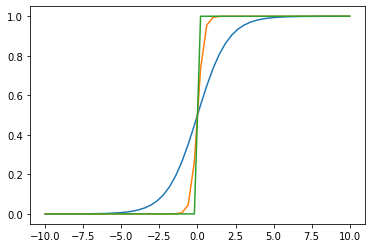

In [4]:
from numpy import exp

def sigmoid(z,w):
    k = z*w
    sig = 1/(1+(exp(-k)))
    return sig
    
x = np.linspace(-10, 10)
ws = [1, 5, 100]
for i in ws:
    f = sigmoid(x,i)
    plt.plot(x,f)
    plt.show

Οι διαφορετικές τιμές του w έχουν επίπτωση στο  διάγραμμα της συνάρτησης. Όσο μεγαλώνει τόσο παρατηρείται συμπεριφορά overfitting. Αυτό οφείλεται στο γεγονός ότι το w επηρεάζει την κλίση της συνάρτησης. Ωστόσο η λογιστική παλινδρόμηση χρησιμοποιείτε για την πρόβλεψη ύπαρξης ή μη ενός χαρακτηριστικού.
Το w σε αυτή την περίπτωση δεν παίζει κάποιο ρόλο στην ιδιότητα ταξινόμησης καθώς γίνεται ακόμα στο 0. Μπορούμε να χρησιμοποιήσουμε είτε ridge για l2 είτε lasso για l1

#### [Ερώτημα 2: Ridge regression]

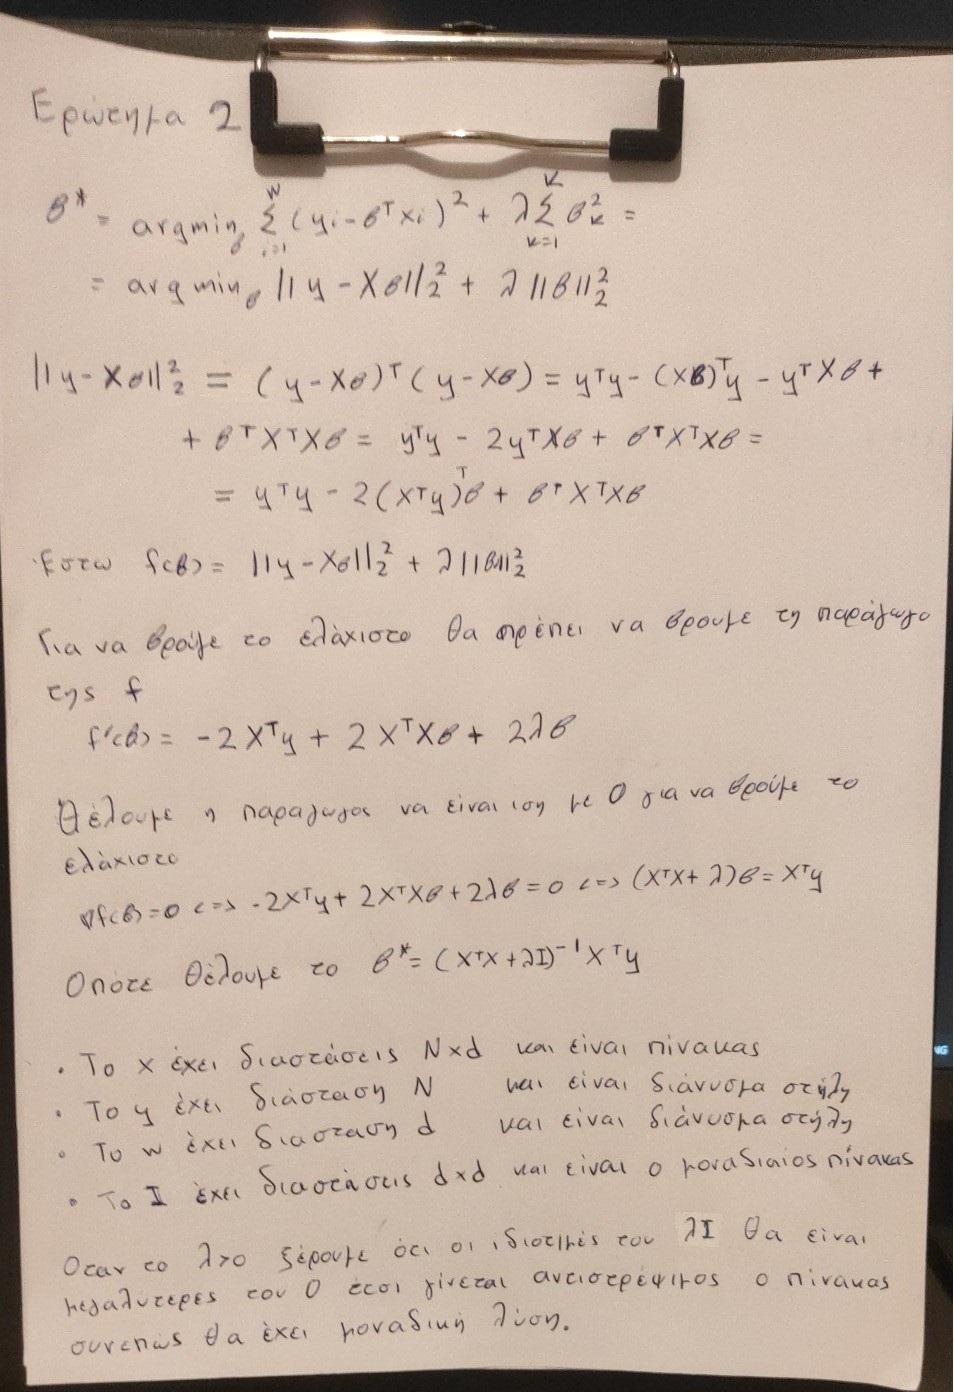

[Ερώτημα 3: Αναγνώριση Προσώπων (Face recognition)]

In [5]:
# set path for load images
# path must end in /
# path = '/content/drive/MyDrive/faces/'
path = 'D:/Desktop/AnagnrProt/hw_2/faces/'

In [6]:
# Ζητούμενo I
def loadImages(path, set_number):
    images = []
    labels = []

    if(set_number == "Set_1"):
        set = list(range(1,7+1))
    elif(set_number == "Set_2"):
        set = list(range(8,19+1))
    elif(set_number == "Set_3"):
        set = list(range(20,31+1))
    elif(set_number == "Set_4"):
        set = list(range(32,45+1))
    elif(set_number == "Set_5"):
        set = list(range(46,64+1))

    str_set = [str(x).zfill(2) for x in set]

    for image in os.listdir(path):
        img = cv2.imread(path+image, 0)
        
        for i in str_set:
            if(image.endswith("_"+ i +".png")):
                # print(image)
                
                # preprocessing
                img = (img - np.mean(img)) / np.std(img)

                images.append(img.flatten()) 

                if(image.startswith("person01")):
                    labels.append(1)
                elif(image.startswith("person02")):
                    labels.append(2)
                elif(image.startswith("person03")):
                    labels.append(3)
                elif(image.startswith("person04")):
                    labels.append(4)
                elif(image.startswith("person05")):
                    labels.append(5)
                elif(image.startswith("person06")):
                    labels.append(6)
                elif(image.startswith("person07")):
                    labels.append(7)
                elif(image.startswith("person08")):
                    labels.append(8)
                elif(image.startswith("person09")):
                    labels.append(9)
                elif(image.startswith("person10")):
                    labels.append(10)

    return np.array(images), labels

In [7]:
sets = ["Set_1", "Set_2", "Set_3", "Set_4", "Set_5"]
images, labels = loadImages(path, sets[0])
white = False

For Set_1 accuracy is: 1.0
For Set_2 accuracy is: 1.0
For Set_3 accuracy is: 0.775
For Set_4 accuracy is: 0.3357142857142857
For Set_5 accuracy is: 0.14210526315789473


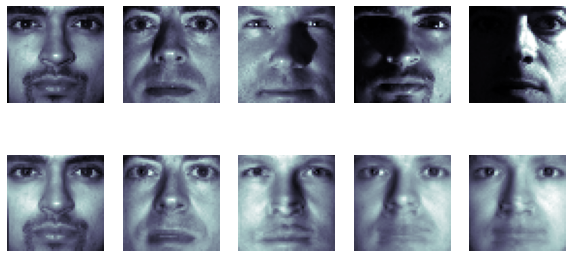

In [8]:
# Ζητούμενo II, IV
d = 9

pca = PCA(n_components = d, whiten = white).fit(images)
eigenfaces = pca.components_.reshape((d, 50, 50))

train_images = pca.transform(images)
train_labels = labels

model = KNeighborsClassifier(n_neighbors = 1, metric = "euclidean")
model.fit(train_images, train_labels)

plt.figure(figsize=(10, 5))
i = 1

for set in sets:
    test_images, test_labels = loadImages(path, set)
    test_images_pca = pca.transform(test_images)

    score = model.score(test_images_pca, test_labels)
    print("For", set, "accuracy is:", score)

    reconstruct = pca.inverse_transform(test_images_pca)
    random = randrange(len(test_labels))
    # print(random)

    plt.subplot(2, 5, i)
    plt.imshow(test_images[random].reshape(50, 50), cmap='bone')
    plt.axis('off')

    plt.subplot(2, 5, i+5)
    plt.imshow(reconstruct[random].reshape(50, 50), cmap='bone')
    plt.axis('off')

    i += 1

For Set_1 accuracy is: 1.0
For Set_2 accuracy is: 1.0
For Set_3 accuracy is: 0.9583333333333334
For Set_4 accuracy is: 0.4357142857142857
For Set_5 accuracy is: 0.22631578947368422


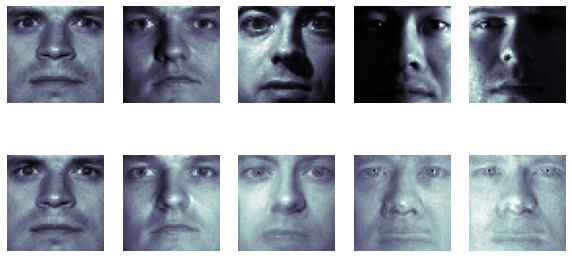

In [9]:
# Ζητούμενo II, IV
d_2 = 30

pca_2 = PCA(n_components = d_2, whiten = white).fit(images)
eigenfaces_2 = pca_2.components_.reshape((d_2, 50, 50))

train_images_2 = pca_2.transform(images)
train_labels = labels

model_2 = KNeighborsClassifier(n_neighbors = 1, metric = "euclidean")
model_2.fit(train_images_2, train_labels)

plt.figure(figsize=(10, 5))
i = 1

for set in sets:
    
    test_images, test_labels = loadImages(path, set)
    test_images_pca = pca_2.transform(test_images)
    
    score = model_2.score(test_images_pca, test_labels)
    print("For", set, "accuracy is:", score)

    reconstruct = pca_2.inverse_transform(test_images_pca)

    # randomly select a photo from the set
    random = randrange(len(test_labels))

    plt.subplot(2, 5, i)
    plt.imshow(test_images[random].reshape(50, 50), cmap='bone')
    plt.axis('off')

    plt.subplot(2, 5, i+5)
    plt.imshow(reconstruct[random].reshape(50, 50), cmap='bone')
    plt.axis('off')

    i += 1

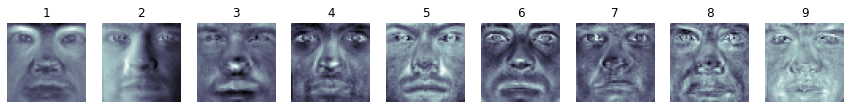

In [10]:
# Ζητούμενo III
plt.figure(figsize=(15, 10))
for i in range(0,d,1):
    plt.subplot(2, d, i+1)
    plt.imshow(eigenfaces[i], cmap='bone')
    plt.title(i+1)
    plt.axis('off')

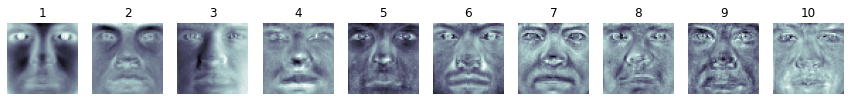

In [11]:
# Ζητούμενo V
U, s, VT = np.linalg.svd(images)

plt.figure(figsize=(15, 10))
for i in range(0,d+1,1):
    plt.subplot(2, d+1, i+1)
    plt.imshow(VT[i].reshape(50, 50), cmap='bone')
    plt.title(i+1)
    plt.axis('off')

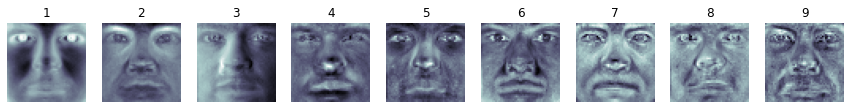

In [12]:
# me covarience kai eig
cov_images = np.cov(images)
eigen_val, eigen_vec = np.linalg.eig(cov_images)

idx = eigen_val.argsort()[::-1]  
eigen_val = eigen_val[idx]
eigen_vec = eigen_vec[:,idx]
reduced_im = np.dot(eigen_vec.T, images)

plt.figure(figsize=(15, 10))
for i in range(0,d,1):
    plt.subplot(2, d, i+1)
    plt.imshow(reduced_im[i].reshape(50, 50), cmap='bone')
    plt.title(i+1)
    plt.axis('off')


In [13]:
print(eigen_vec)

[[-0.13395677  0.01216701  0.01279821 ... -0.01143426  0.00131027
   0.00399891]
 [-0.11861405  0.01122692 -0.09987457 ... -0.03734082  0.05982382
  -0.06584051]
 [-0.12904895  0.01914965 -0.0614029  ... -0.09368267  0.13272184
  -0.13197523]
 ...
 [-0.1288824  -0.09627409  0.07678379 ...  0.059331   -0.12515524
   0.05337106]
 [-0.12232324 -0.08743423 -0.20407333 ...  0.02785831 -0.06645284
   0.0347301 ]
 [-0.11511262 -0.10395271  0.19090336 ... -0.0719909   0.10249176
  -0.03221051]]


In [14]:
print(U)

[[-0.13395677 -0.01216701 -0.01279821 ...  0.01143426  0.00131027
   0.00399891]
 [-0.11861405 -0.01122692  0.09987457 ...  0.03734082  0.05982382
  -0.06584051]
 [-0.12904895 -0.01914965  0.0614029  ...  0.09368267  0.13272184
  -0.13197523]
 ...
 [-0.1288824   0.09627409 -0.07678379 ... -0.059331   -0.12515524
   0.05337106]
 [-0.12232324  0.08743423  0.20407333 ... -0.02785831 -0.06645284
   0.0347301 ]
 [-0.11511262  0.10395271 -0.19090336 ...  0.0719909   0.10249176
  -0.03221051]]


#### Ζητούμενo ΙΙ-ΙV
Με περισσότερα χαρακτηριστικά χαμηλής διάστασης d παρατηρούμε καλύτερη ακρίβεια ταξινόμησης. Ωστόσο δεν πρέπει να την αυξήσουμε πάρα πολύ γιατί μετά από ένα σημείο θα έχουμε άχρηστες πληροφορίες που δεν θα προσφέρουν κάτι. Όσο πιο σκούρα είναι η εικόνα (Σετ 4, 5) τόσο πιο δύσκολη η αναγνώριση της (low accuracy) και αντίστοιχα θα έχει χειρότερη ανακατασκευή. Το αντίθετο συμβαίνει για τις εικόνες στα Σετ 1 έως 3.

#### Ζητούμενo V
Tα singular vectors παρατηρούμε ότι διαφέρουν από τα αντίστοιχα ιδιοδιανύσματα του ζητούμενου 3. Ωστόσο μπορεί να είναι ίδια με κάποια άλλα πχ η 4η εικόνα του ΙΙΙ με την 5η του svd.
Αντίστοιχα 5 με 6 και 8 με 9. Αυτό συμβαίνει γιατι στο data που έχει γίνει preprocessed αφού κάνουμε το SVD υπάρχει ένα λιγότερο στοιχείο 

U είναι τα singular vectors αριστερού πίνακα της παράστασης και είναι ίδιος κατά απολυτή τιμή με τα ιδιοδυνύσματα του covariance